<h2>Analytical Exploration of Boston Crime Statistics (2012-2015)</h2>





<h3>Import needed libraries</h3>

In [15]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')

<h3>Read the dataset</h3>

In [16]:
crimes = pd.read_csv('file.csv',error_bad_lines=False)

print ('Dataset ready..')

Dataset ready..


/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h3>Drop unnessary columns</h3>

In [17]:
print('Dataset Shape before drop_duplicate : ', crimes.shape)
crimes.drop_duplicates(subset=['COMPNOS'], inplace=True)
print('Dataset Shape after drop_duplicate: ', crimes.shape)

# Originally I wanted to keep X and Y but did not figure out why the numbers were formatted differently.
crimes.drop(['COMPNOS', 'NatureCode', 'MAIN_CRIMECODE', 'UCRPART',
    'DOMESTIC', 'REPORTINGAREA', 'XSTREETNAME', 'X', 'Y'], inplace=True, axis=1)

print(crimes.head(3))

Dataset Shape before drop_duplicate :  (268056, 20)
Dataset Shape after drop_duplicate:  (255797, 20)
  INCIDENT_TYPE_DESCRIPTION REPTDISTRICT                FROMDATE WEAPONTYPE  \
0      RESIDENTIAL BURGLARY           D4  07/08/2012 06:00:00 AM      Other   
1        AGGRAVATED ASSAULT           B2  07/08/2012 06:03:00 AM    Firearm   
2                   ROBBERY           D4  07/08/2012 06:26:00 AM    Firearm   

  Shooting SHIFT  Year  Month DAY_WEEK   STREETNAME  \
0       No  Last  2012      7   Sunday  ABERDEEN ST   
1      Yes  Last  2012      7   Sunday    HOWARD AV   
2       No  Last  2012      7   Sunday    JERSEY ST   

                      Location  
0  (42.34638135, -71.10379454)  
1  (42.31684135, -71.07458456)  
2  (42.34284135, -71.09698955)  


<h3>Format dates</h3>

In [18]:
# crimes = crimes[:-60]

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255797 entries, 2012-07-08 06:00:00 to 2015-06-26 13:55:00
Data columns (total 11 columns):
INCIDENT_TYPE_DESCRIPTION    255797 non-null object
REPTDISTRICT                 255793 non-null object
FROMDATE                     255797 non-null object
WEAPONTYPE                   255797 non-null object
Shooting                     255797 non-null object
SHIFT                        255791 non-null object
Year                         255797 non-null int64
Month                        255797 non-null int64
DAY_WEEK                     255797 non-null object
STREETNAME                   255796 non-null object
Location                     255797 non-null object
dtypes: int64(2), object(9)
memory usage: 23.4+ MB
None
(255797, 11)


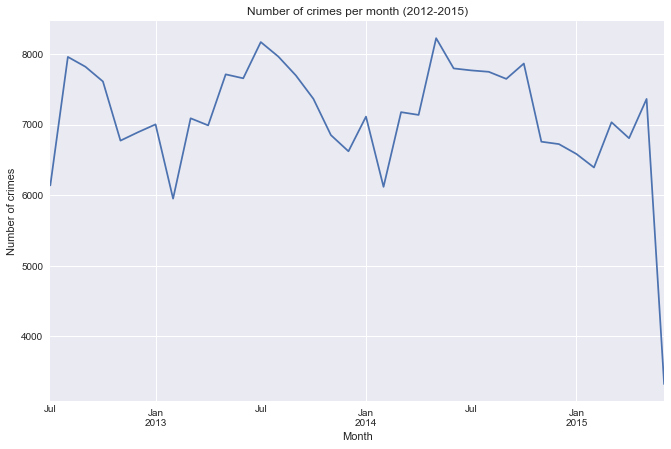

In [19]:
crimes.Date = pd.to_datetime(crimes.FROMDATE, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

print(crimes.info())
print(crimes.shape)

#loc_to_change = list(crimes['STREETNAME'].value_counts()[20:].index)
#desc_to_change = list(crimes['INCIDENT_TYPE_DESCRIPTION'].value_counts()[20:].index)

#crimes.loc[crimes['STREETNAME'].isin(loc_to_change), crimes.columns=='STREETNAME'] = 'OTHER'
#crimes.loc[crimes['INCIDENT_TYPE_DESCRIPTION'].isin(desc_to_change), crimes.columns=='INCIDENT_TYPE_DESCRIPTION'] = 'OTHER'

#crimes['STREETNAME'] = pd.Categorical(crimes['STREETNAME Type'])
#crimes['INCIDENT_TYPE_DESCRIPTION'] = pd.Categorical(crimes['INCIDENT_TYPE_DESCRIPTION Type'])

plt.figure(figsize=(11, 7))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2012-2015)')
plt.xlabel('Month')
plt.ylabel('Number of crimes')
plt.show()

<h3>Drop row after a certain time</h3>

In [7]:
#crimes = crimes[:-60]

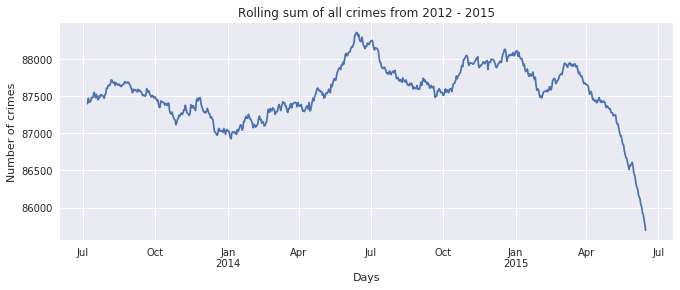

In [8]:
plt.figure(figsize=(11, 4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2012 - 2015')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

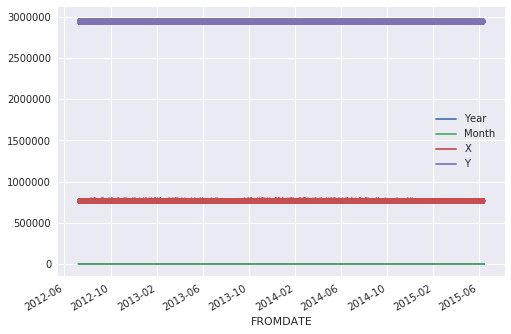

In [9]:
crimes.plot()